## Семинар 4
# Тема: Диагностика переобучения модели и борьба с ним на примере решающего дерева

### Переобучение
Переобучение - ситуация, при которой данные из обучающей выборки будут описываться хорошо, а тестовые данные плохо.

Иначе говоря, значения метрик будут хорошими на обучающей выборке, а на тестовой - плохими.

В ситуации переобучения модель слишком сильно подогоняется под обучающую выборку. Модель необходимо упрощать.

### Выявление переобучения
Выявляют переобучения, вычисляя метрики на:

$\bullet$ обучающих данных

$\bullet$ тестовых данных

Затем сравнивают их значения. Находя метрики на обучающих и тестовых данных, вычислять их нужно используя кросс-валидацию, а не разбиение на две части.

### Кривая проверки
Справиться с переобучением можно уменьшив параметр сложностьи модели.

Требуется найти оптимальное значение параметра сложности модели, т.е. компромисс между переобучением и недообучением.
Для этого строят, так называемую, кривую проверки (validation_curve), она представляет собой зависимость значения метрики от параметра сложности на обучающих и тестовых данных. Фактически это две кривые. Ситуация переобучения будет, когда расстояние между кривыми большое, т.е. разброс (variance) велик. Ситуация недообучения будет, когда обе кривые слишком далеко от идеального значения метрики, т.е. смещение (bias) от нужного значения (например, единицы в случае метрики accuracy) велико. По графику ищут оптимальное значение параметра сложности, т.е. компромисс между переобучением и недообучением.

Для дерева решений параметром сложности модели будет, например, глубина дерева (max_depth).

### Кривая заучивания
Второй способ справиться с переобучением - это добавить новые данные, но, т.к. собрать новые данные не такая простая задача, прежде чем это делать следует оценить будет ли эффект от добавления новых данных, т.е. удастся ли уменньшить разброс (variance) при добавлении новых данных. Для этого нужно построить кривую заучивания (learning curve). Кривая заучивания даёт визуальное представление способности модели улучшаться за счет добавления новых образцов.

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_validate

from sklearn.model_selection import validation_curve, learning_curve

### 1. Загрузите датасет `titanic.csv` и выведите первые 5 строк. Отдедите целевую переменную 'Survived' и обозначьте данные за `X`, а целевую переменную за `y`. Выведите их размеры.

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [3]:
y = df['Survived'].values
X = df.drop(['PassengerId', 'Survived'], axis=1).values
X[:5]

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         0.    ,  0.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         0.    ,  1.    ],
       [ 3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ,  1.    ]])

In [4]:
X.shape, y.shape

((891, 9), (891,))

### 2. Сделайте 10-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeClassifier(random_state=3) с вычислением двух метрик accuracy и F1, используя библиотечную функцию cross_validate. Установите значение параметра return_train_score этой функции True для того, чтобы выводились значения метрик не только на тестовых данных, но и на обучающих тоже. Результаты выведите в виде двух датафреймов, оставив в первом только два столбца со значениями метрики accuracy на обучающих и тестовых данных, а во втором со значениями метрики F1.

In [5]:
clf = DecisionTreeClassifier(random_state=3)
cv_result = cross_validate(clf, X, y, cv=10, scoring=['accuracy', 'f1_macro'], return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,0.013562,0.017764,0.700000,0.977528,0.688900,0.976018
1,0.005355,0.034218,0.775281,0.978803,0.759199,0.977412
2,0.021192,0.017436,0.741573,0.982544,0.708446,0.981435
3,0.007553,0.010201,0.764045,0.976309,0.753982,0.974687
4,0.027858,0.009061,0.831461,0.977556,0.822497,0.976068
5,0.005216,0.014685,0.752809,0.980050,0.741005,0.978755
6,0.019693,0.024405,0.808989,0.976309,0.788006,0.974721
7,0.014987,0.023633,0.764045,0.976309,0.738125,0.974687
8,0.024127,0.029866,0.842697,0.976309,0.838098,0.974721
9,0.025559,0.042704,0.797753,0.977556,0.785829,0.976004


In [6]:
score_accuracy = pd.DataFrame(cv_result)[['train_accuracy', 'test_accuracy']]
score_accuracy

,train_accuracy,test_accuracy
0,0.977528,0.700000
1,0.978803,0.775281
2,0.982544,0.741573
3,0.976309,0.764045
4,0.977556,0.831461
5,0.980050,0.752809
6,0.976309,0.808989
7,0.976309,0.764045
8,0.976309,0.842697
9,0.977556,0.797753


In [7]:
score_f1 = pd.DataFrame(cv_result)[['train_f1_macro', 'test_f1_macro']]
score_f1

,train_f1_macro,test_f1_macro
0,0.976018,0.688900
1,0.977412,0.759199
2,0.981435,0.708446
3,0.974687,0.753982
4,0.976068,0.822497
5,0.978755,0.741005
6,0.974721,0.788006
7,0.974687,0.738125
8,0.974721,0.838098
9,0.976004,0.785829


### 3. Найдите средние значения метрики accuracy на обучающих и на тестовых данных. Сравните эти значения между собой и сделайте предположение о переобученности модели. Проделайте аналогичные действия со значениями метрики F1.

In [8]:
score_accuracy.mean(axis=0)

,0
train_accuracy,0.977927
test_accuracy,0.777865


In [9]:
score_f1.mean(axis=0)

,0
train_f1_macro,0.976451
test_f1_macro,0.762409


### 4. Визуализируйте для метрик accuracy и F1 полученные результаты перекрёстной-проверки, написав функцию plot_cv_scores, которая строит значения метрик на обучающих и тестовых данных для каждого блока. Убедитесь по графикам, что имеет место переобучение, т.к. ломаные линии для обучающих и тестовых данных не пересекаются.

In [10]:
def plot_cv_scores(scores, scoring):
  plt.figure(figsize = (8, 6))
  plt.plot(scores.iloc[:,0], label = "Train", marker =".")
  plt.plot(scores.iloc[:,1], label = "Test", marker =".")

  plt.axhline(y=1, color="black", ls='dashed')

  plt.legend()
  plt.title("Диагностика переобучения")
  plt.xlabel("Итерации кросс-валидации")
  plt.ylabel(scoring)
  plt.show()

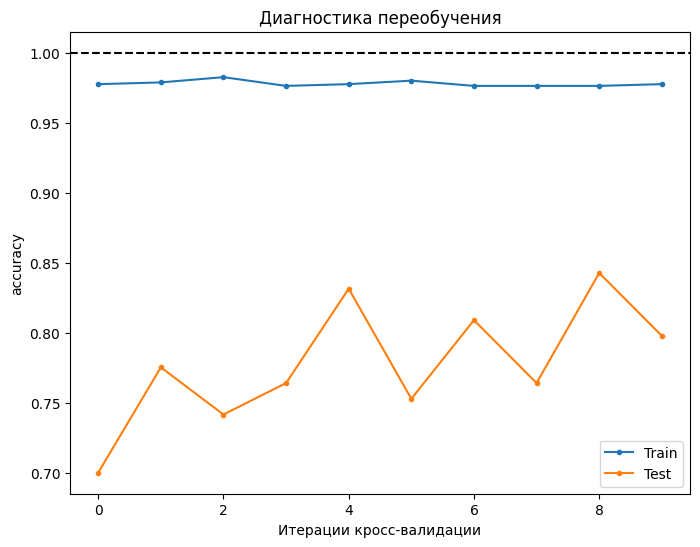

In [11]:
plot_cv_scores(score_accuracy, 'accuracy')

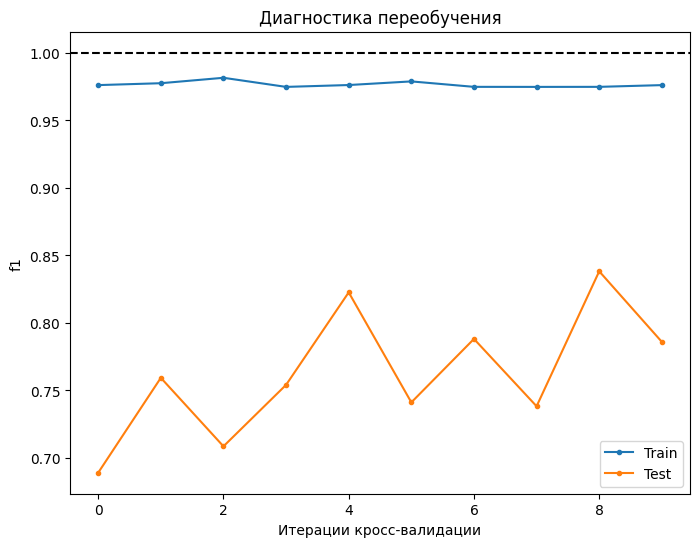

In [12]:
plot_cv_scores(score_f1, 'f1')

### 5. Поборитесь с переобучением в этой задаче, для этого варьируйте значение гиперпараметра max_depth (он является параметром регуляризации для дерева решений) и постройте соответствующую ***кривую проверки***, вычислив необходимые для её построения значения при помощи функции validation_curve. Используйте метрический показатель F1. Глядя на график, определите оптимальное значение  max_depth.

In [13]:
max_depth = np.arange(1, 10)
max_depth

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
train_scores, test_scores = validation_curve(clf, X, y, param_name='max_depth', param_range=max_depth, cv=5, scoring='f1_macro')
train_scores

array([[0.76503901, 0.76599142, 0.77070463, 0.78112647, 0.77106886],
       [0.75414306, 0.73539364, 0.78540256, 0.79658894, 0.77106886],
       [0.80686662, 0.80802534, 0.81107255, 0.81948886, 0.79377744],
       [0.81061376, 0.82249076, 0.82264594, 0.82366938, 0.8037957 ],
       [0.84168983, 0.83955502, 0.82738408, 0.84173761, 0.84127066],
       [0.85232173, 0.85289805, 0.83711347, 0.86577795, 0.857739  ],
       [0.87173092, 0.87706709, 0.84847184, 0.88523028, 0.87626646],
       [0.88657246, 0.88282919, 0.86408186, 0.90359344, 0.89513924],
       [0.91186012, 0.90434583, 0.88495988, 0.91246239, 0.90017641]])

In [15]:
train_scores.mean(axis=1)

array([0.77078608, 0.76851941, 0.80784616, 0.81664311, 0.83832744,
       0.85317004, 0.87175332, 0.88644324, 0.90276093])

In [16]:
def plot_train_test_curves(train_scores, test_scores, x):
  plt.figure(figsize = (8, 6))
  plt.plot(x, train_scores.mean(axis=1), label="Training scores", color="r")
  plt.plot(x, test_scores.mean(axis=1), label="Test scores", color="g")
  plt.axhline(y=1, color="black", ls='dashed')
  plt.legend()

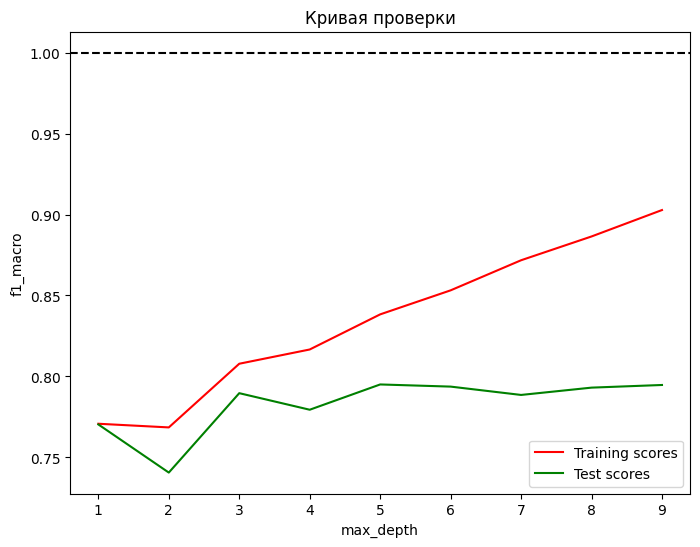

In [17]:
plot_train_test_curves(train_scores, test_scores, max_depth)
plt.title("Кривая проверки")
plt.xlabel('max_depth')
plt.ylabel('f1_macro')
plt.show()

In [18]:
max_depth = 5

### 6. Сделайте 10-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeClassifier с random_state=3 и найденным оптимальным значением max_depth, используя библиотечную функцию cross_validate. Результаты выведите в виде двух датафреймов, оставив в первом только два столбца со значениями метрики accuracy на обучающих и тестовых данных, а во втором со значениями метрики F1. Найдите средние значения метрик accuracy и F1 на обучающих и на тестовых данных.

In [19]:
clf_opt = DecisionTreeClassifier(random_state = 3, max_depth = 5)
cv_result = cross_validate(clf_opt, X, y, cv=10, scoring=['accuracy', 'f1_macro'], return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,0.006364,0.004779,0.722222,0.865169,0.694750,0.850487
1,0.002348,0.003378,0.797753,0.850374,0.769828,0.831880
2,0.002270,0.003058,0.786517,0.856608,0.763066,0.845945
3,0.002171,0.002874,0.797753,0.855362,0.790094,0.840069
4,0.002425,0.003896,0.842697,0.845387,0.833422,0.832305
5,0.002179,0.002771,0.797753,0.847880,0.777253,0.835502
6,0.002187,0.003736,0.786517,0.846633,0.759151,0.834519
7,0.002156,0.002795,0.786517,0.869077,0.754821,0.857233
8,0.002216,0.002856,0.876404,0.844140,0.866712,0.831581
9,0.002169,0.002791,0.820225,0.851621,0.811640,0.840361


In [20]:
score_accuracy = pd.DataFrame(cv_result)[['train_accuracy', 'test_accuracy']]
score_accuracy

,train_accuracy,test_accuracy
0,0.865169,0.722222
1,0.850374,0.797753
2,0.856608,0.786517
3,0.855362,0.797753
4,0.845387,0.842697
5,0.847880,0.797753
6,0.846633,0.786517
7,0.869077,0.786517
8,0.844140,0.876404
9,0.851621,0.820225


In [21]:
score_f1 = pd.DataFrame(cv_result)[['train_f1_macro', 'test_f1_macro']]
score_f1

,train_f1_macro,test_f1_macro
0,0.850487,0.694750
1,0.831880,0.769828
2,0.845945,0.763066
3,0.840069,0.790094
4,0.832305,0.833422
5,0.835502,0.777253
6,0.834519,0.759151
7,0.857233,0.754821
8,0.831581,0.866712
9,0.840361,0.811640


In [22]:
score_accuracy.mean(axis=0)

,0
train_accuracy,0.853225
test_accuracy,0.801436


In [23]:
score_f1.mean(axis=0)

,0
train_f1_macro,0.839988
test_f1_macro,0.782074


### 7. Убедитесь, что переобучение больше нет, построив соответствующие графики при помощи функции plot_cv_scores.

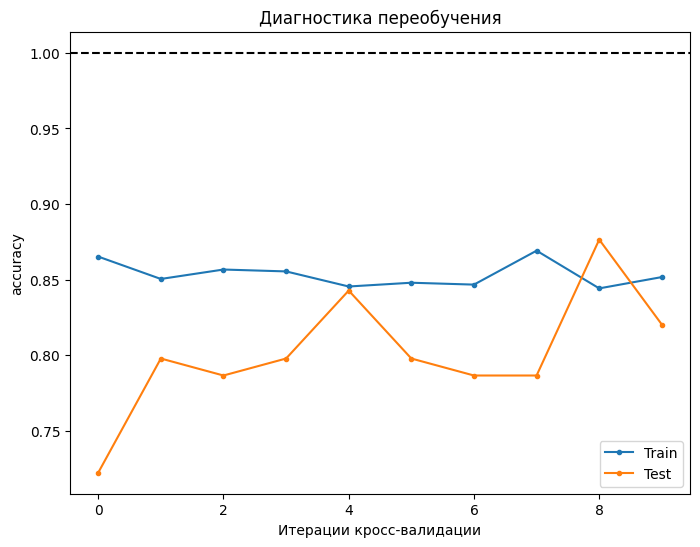

In [24]:
plot_cv_scores(score_accuracy, "accuracy")

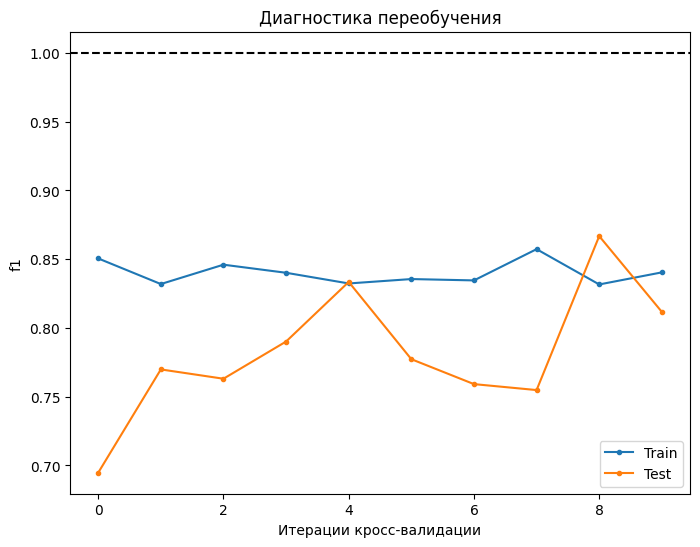

In [25]:
plot_cv_scores(score_f1, "f1")

### 8. Постройте ***кривую заучивания***, вычислив необходимые для её построения значения при помощи функции learning_curve. Используйте метрический показатель F1. Глядя на график, сделайте вывод о том, может ли помочь в борьбе с переобучением добавление новых данных.

In [26]:
train_size = np.linspace(0.01, 1.0, 50)
train_size

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

In [27]:
train_sizes, train_scores, test_scores = learning_curve(clf_opt, X, y, cv=7, scoring='f1_macro', train_sizes=train_size)
train_sizes

array([  7,  23,  38,  53,  69,  84, 100, 115, 130, 146, 161, 177, 192,
       208, 223, 238, 254, 269, 285, 300, 315, 331, 346, 362, 377, 393,
       408, 423, 439, 454, 470, 485, 500, 516, 531, 547, 562, 578, 593,
       608, 624, 639, 655, 670, 685, 701, 716, 732, 747, 763])

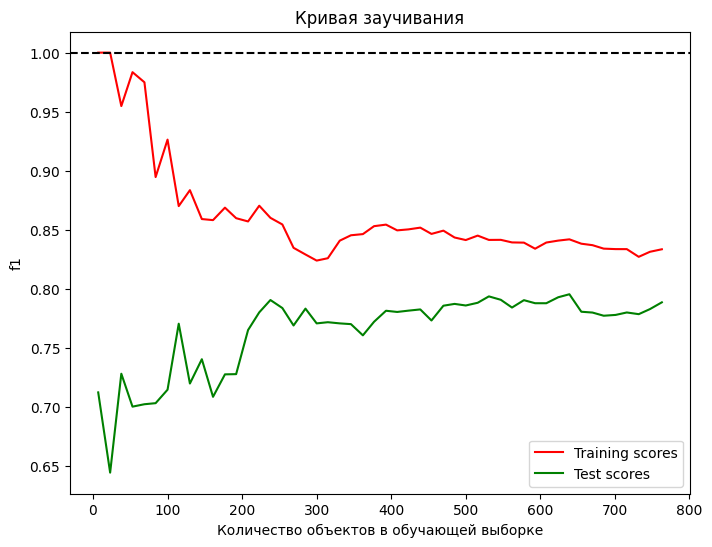

In [28]:
plot_train_test_curves(train_scores, test_scores, train_sizes)
plt.xlabel("Количество объектов в обучающей выборке")
plt.ylabel("f1")
plt.title("Кривая заучивания")
plt.show()

## Задания для самостоятельного выполнения
1. Загрузите датасет `boston.csv` и выведите первые 5 строк. Отдедите целевую переменную 'MEDV' и обозначьте данные за `X`, а целевую переменную за `y`. Выведите их размеры.
2. Убедитесь, что решается задача регрессии, для этого выведите количество уникальных значений целевой переменной и сравните его с общим количеством наблюдений.
3. Сделайте 7-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeRegressor(random_state=0) с вычислением метрики neg_mean_squared_error, используя библиотечную функцию cross_validate. Установите значение параметра return_train_score этой функции True для того, чтобы выводились значения метрик не только на тестовых данных, но и на обучающих тоже. Результаты выведите в виде датафрейма, оставив только два столбца со значениями метрики на обучающих и тестовых данных, но заменив знак каждого значения на противоположный, чтобы вместо метрики neg_mean_squared_error, получалась метрика mean_squared_error.
4. Найдите средние значения метрики mean_squared_error на обучающих и на тестовых данных. Сравните эти значения между собой и сделайте предположение о переобученности модели.
5. Визуализируйте для метрики mean_squared_error полученные результаты перекрёстной-проверки, используя функцию plot_cv_scores. Убедитесь по графикам, что имеет место переобучение, т.к. ломаные линии для обучающих и тестовых данных не пересекаются.
6. Поборитесь с переобучением, для этого варьируйте значение гиперпараметра max_depth = [1, 2, 3, 4, 5, 6]  и постройте соответствующую ***кривую проверки***, вычислив необходимые для её построения значения при помощи функции validation_curve. Используйте метрический показатель neg_mean_squared_error. Глядя на график, определите оптимальное значение  max_depth.
7. Сделайте 7-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeClassifier с random_state=0 и найденным оптимальным значением max_depth, используя библиотечную функцию cross_validate. Результаты выведите в виде датафрейма, оставив только два столбца со значениями метрики на обучающих и тестовых данных, заменив их знаки. Найдите среднее значение метрики mean_squared_error на обучающих и на тестовых данных.
8. Убедитесь, что переобучение больше нет, построив соответствующие графики при помощи функции plot_cv_scores.
9. Постройте ***кривую заучивания***, вычислив необходимые для её построения значения при помощи функции learning_curve. Используйте метрический показатель neg_mean_squared_error. Глядя на график, сделайте вывод о том, может ли помочь в борьбе с переобучением добавление новых данных.

1. Загрузите датасет boston.csv и выведите первые 5 строк. Отдедите целевую переменную 'MEDV' и обозначьте данные за X, а целевую переменную за y. Выведите их размеры.

In [37]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
y = df['MEDV'].values
X = df.drop(['MEDV'], axis=1).values
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [39]:
X.shape, y.shape

((506, 13), (506,))

2. Убедитесь, что решается задача регрессии, для этого выведите количество уникальных значений целевой переменной и сравните его с общим количеством наблюдений.

In [40]:
pd.Series(y).value_counts()

,count
50.0,16
25.0,8
22.0,7
21.7,7
23.1,7
...,...
32.9,1
34.6,1
30.3,1
33.3,1


3. Сделайте 7-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeRegressor(random_state=0) с вычислением метрики neg_mean_squared_error, используя библиотечную функцию cross_validate. Установите значение параметра return_train_score этой функции True для того, чтобы выводились значения метрик не только на тестовых данных, но и на обучающих тоже. Результаты выведите в виде датафрейма, оставив только два столбца со значениями метрики на обучающих и тестовых данных, но заменив знак каждого значения на противоположный, чтобы вместо метрики neg_mean_squared_error, получалась метрика mean_squared_error.

In [42]:
clf = DecisionTreeRegressor(random_state=0)
cv_result = cross_validate(clf, X, y, cv=10, scoring=['neg_mean_squared_error'], return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.012296,0.002276,-18.089412,-0.0
1,0.009252,0.001712,-10.618431,-0.0
2,0.009682,0.001415,-16.318431,-0.0
3,0.009206,0.001843,-44.978039,-0.0
4,0.011561,0.001708,-17.125098,-0.0
5,0.009267,0.001846,-49.715098,-0.0
6,0.008322,0.001633,-12.998600,-0.0
7,0.009259,0.001644,-88.451400,-0.0
8,0.009619,0.001591,-55.791400,-0.0
9,0.009192,0.001573,-25.081600,-0.0


In [47]:
score_neg_mean_squared_error = pd.DataFrame(cv_result)[['train_neg_mean_squared_error', 'test_neg_mean_squared_error']]
score_neg_mean_squared_error

,train_neg_mean_squared_error,test_neg_mean_squared_error
0,-0.0,-18.089412
1,-0.0,-10.618431
2,-0.0,-16.318431
3,-0.0,-44.978039
4,-0.0,-17.125098
5,-0.0,-49.715098
6,-0.0,-12.998600
7,-0.0,-88.451400
8,-0.0,-55.791400
9,-0.0,-25.081600


In [48]:
score_mean_squared_error = -score_neg_mean_squared_error
score_mean_squared_error

,train_neg_mean_squared_error,test_neg_mean_squared_error
0,0.0,18.089412
1,0.0,10.618431
2,0.0,16.318431
3,0.0,44.978039
4,0.0,17.125098
5,0.0,49.715098
6,0.0,12.998600
7,0.0,88.451400
8,0.0,55.791400
9,0.0,25.081600


4. Найдите средние значения метрики mean_squared_error на обучающих и на тестовых данных. Сравните эти значения между собой и сделайте предположение о переобученности модели.

In [49]:
score_mean_squared_error.mean(axis=0)

,0
train_neg_mean_squared_error,0.000000
test_neg_mean_squared_error,33.916751


5. Визуализируйте для метрики mean_squared_error полученные результаты перекрёстной-проверки, используя функцию plot_cv_scores. Убедитесь по графикам, что имеет место переобучение, т.к. ломаные линии для обучающих и тестовых данных не пересекаются.

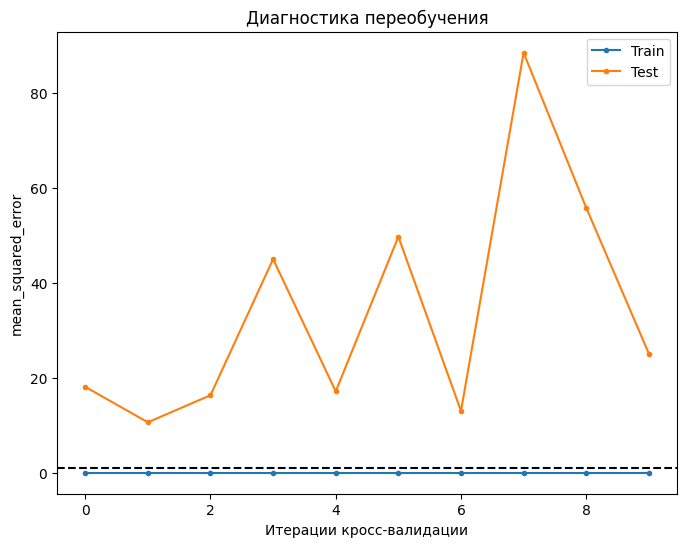

In [50]:
plot_cv_scores(score_mean_squared_error, "mean_squared_error")

6. Поборитесь с переобучением, для этого варьируйте значение гиперпараметра max_depth = [1, 2, 3, 4, 5, 6] и постройте соответствующую кривую проверки, вычислив необходимые для её построения значения при помощи функции validation_curve. Используйте метрический показатель neg_mean_squared_error. Глядя на график, определите оптимальное значение max_depth.

In [51]:
max_depth = np.array([1, 2, 3, 4, 5, 6])

In [54]:
train_scores, test_scores = validation_curve(clf, X, y, param_name='max_depth', param_range=max_depth, cv=5, scoring='neg_mean_squared_error')
train_scores

array([[-50.91509139, -47.45375901, -39.46333821, -35.64055855,
        -44.21330715],
       [-27.36845299, -26.24649951, -22.88685892, -16.72582086,
        -25.38498252],
       [-16.80806356, -14.29581196, -15.25504215, -10.99245365,
        -13.45859031],
       [ -9.72767256,  -8.15331598,  -9.05749125,  -7.68729846,
         -9.0888174 ],
       [ -6.65582749,  -5.32588279,  -6.00616753,  -5.22549852,
         -6.22949607],
       [ -4.72330444,  -3.43856357,  -4.10351323,  -3.44209584,
         -4.25477189]])

In [53]:
train_scores.mean(axis=1)

array([-43.53721086, -23.72252296, -14.16199233,  -8.74291913,
        -5.88857448,  -3.99244979])

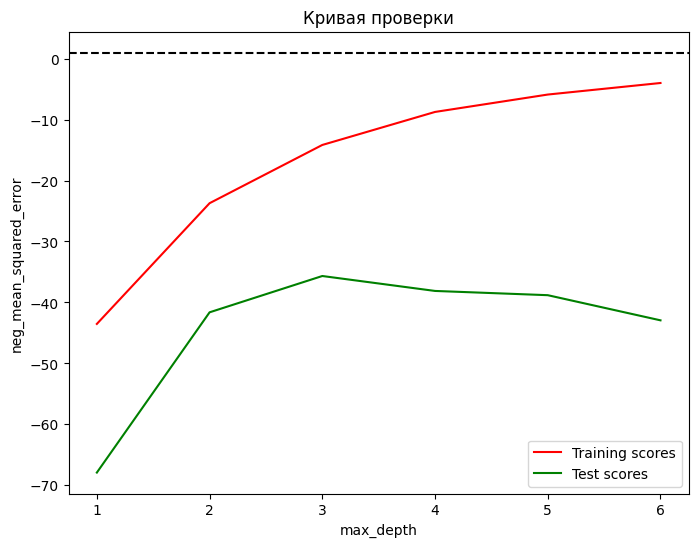

In [55]:
plot_train_test_curves(train_scores, test_scores, max_depth)
plt.title("Кривая проверки")
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')
plt.show()

In [56]:
max_depth = 3

7. Сделайте 7-блочную перекрёстную проверку (кросс-валидацию) модели DecisionTreeClassifier с random_state=0 и найденным оптимальным значением max_depth, используя библиотечную функцию cross_validate. Результаты выведите в виде датафрейма, оставив только два столбца со значениями метрики на обучающих и тестовых данных, заменив их знаки. Найдите среднее значение метрики mean_squared_error на обучающих и на тестовых данных.

In [61]:
clf_opt = DecisionTreeRegressor(random_state = 0, max_depth = 3)
cv_result = cross_validate(clf_opt, X, y, cv=7, scoring=['neg_mean_squared_error'], return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.004771,0.001064,-20.119622,-16.477369
1,0.002430,0.001458,-10.179267,-16.397745
2,0.002900,0.001002,-31.103173,-13.513918
3,0.002926,0.001497,-45.752214,-15.937971
4,0.002834,0.001000,-21.084571,-16.131771
5,0.002468,0.000888,-86.145991,-9.689361
6,0.002237,0.001021,-22.062352,-15.415609


In [63]:
score_mean_squared_error = - pd.DataFrame(cv_result)[['train_neg_mean_squared_error', 'test_neg_mean_squared_error']]
score_mean_squared_error

,train_neg_mean_squared_error,test_neg_mean_squared_error
0,16.477369,20.119622
1,16.397745,10.179267
2,13.513918,31.103173
3,15.937971,45.752214
4,16.131771,21.084571
5,9.689361,86.145991
6,15.415609,22.062352


In [64]:
score_mean_squared_error.mean(axis=0)

,0
train_neg_mean_squared_error,14.794821
test_neg_mean_squared_error,33.778170


8. Убедитесь, что переобучение больше нет, построив соответствующие графики при помощи функции plot_cv_scores.

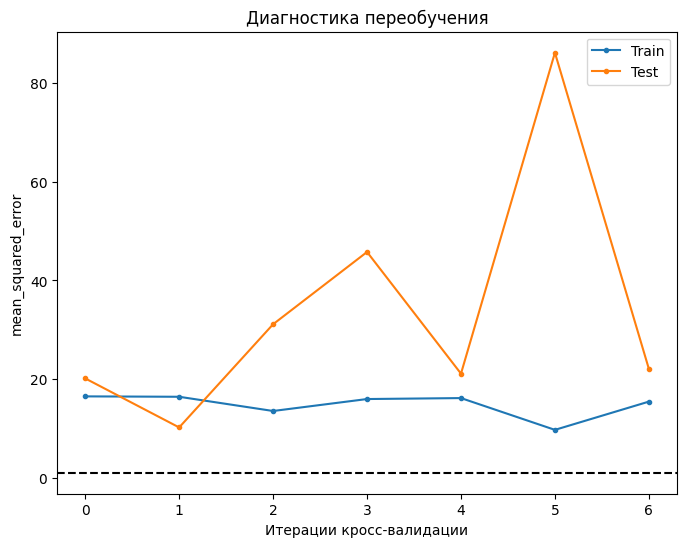

In [65]:
plot_cv_scores(score_mean_squared_error, "mean_squared_error")

9. Постройте кривую заучивания, вычислив необходимые для её построения значения при помощи функции learning_curve. Используйте метрический показатель neg_mean_squared_error. Глядя на график, сделайте вывод о том, может ли помочь в борьбе с переобучением добавление новых данных.

In [66]:
train_size = np.linspace(0.01, 1.0, 50)
train_size

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

In [67]:
train_sizes, train_scores, test_scores = learning_curve(clf_opt, X, y, cv=7, scoring='neg_mean_squared_error', train_sizes=train_size)
train_sizes

array([  4,  13,  21,  30,  39,  48,  56,  65,  74,  83,  91, 100, 109,
       118, 126, 135, 144, 153, 161, 170, 179, 188, 196, 205, 214, 223,
       231, 240, 249, 258, 266, 275, 284, 293, 301, 310, 319, 328, 336,
       345, 354, 363, 371, 380, 389, 398, 406, 415, 424, 433])

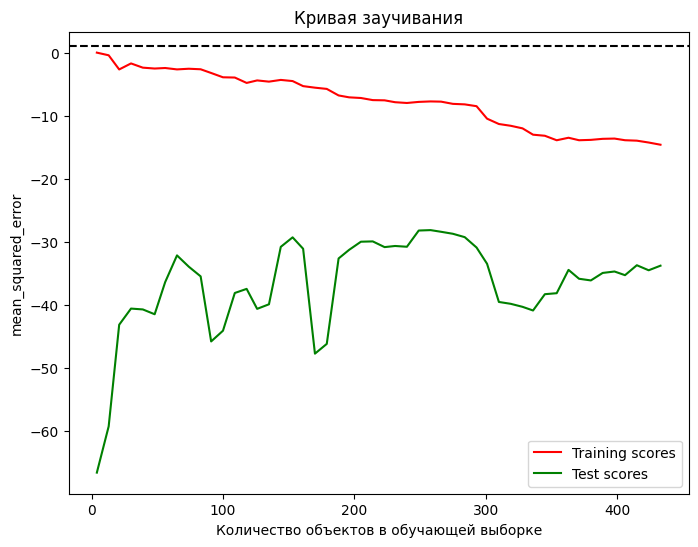

In [68]:
plot_train_test_curves(train_scores, test_scores, train_sizes)
plt.xlabel("Количество объектов в обучающей выборке")
plt.ylabel("mean_squared_error")
plt.title("Кривая заучивания")
plt.show()